In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../data/Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [3]:
df.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [4]:
df['Profession']=df['Profession'].fillna('not_mentioned')

In [5]:
df['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', 'not_mentioned'],
      dtype=object)

In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

In [7]:
df = df.convert_dtypes()
df.dtypes

CustomerID                 Int64
Gender                    string
Age                        Int64
Annual Income ($)          Int64
Spending Score (1-100)     Int64
Profession                string
Work Experience            Int64
Family Size                Int64
dtype: object

In [8]:
df.head(4)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2


In [9]:
for col in df.columns:
    if (df[col].isna().sum()/len(df[col])) >0.7:
        print(col)

Annual Income ($)
Gender Profession                   
Female Artist               41078884
       Doctor                9742222
       Engineer             11175263

,Gender,Profession,Annual Income ($)
0,Female,Artist,41078884
1,Female,Doctor,9742222
2,Female,Engineer,11175263
3,Female,Entertainment,14484697
4,Female,Executive,10335668


<AxesSubplot:xlabel='Profession', ylabel='Annual Income ($)'>

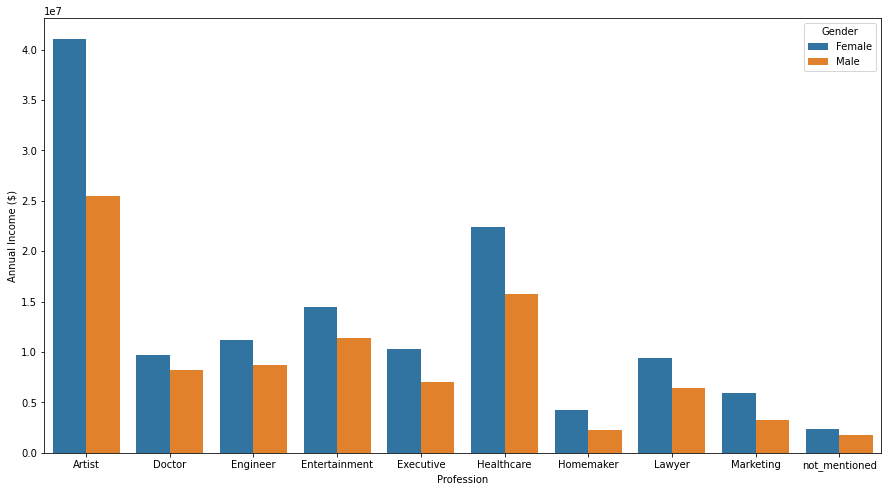

In [10]:
df2=pd.DataFrame(df.groupby(['Gender','Profession'])['Annual Income ($)'].sum())
display(df2.head(3))
df3=df2.reset_index()
display(df3.head(5))

plt.figure(figsize=(15,8))
sns.barplot(x='Profession', y='Annual Income ($)', hue='Gender', data=df3)

Spending Score (1-100)
Gender Profession                        
Female Artist                       19707
       Doctor                        4598
       Engineer                      5166

,Gender,Profession,Spending Score (1-100)
0,Female,Artist,19707
1,Female,Doctor,4598
2,Female,Engineer,5166
3,Female,Entertainment,6918
4,Female,Executive,4854


<AxesSubplot:xlabel='Profession', ylabel='Spending Score (1-100)'>

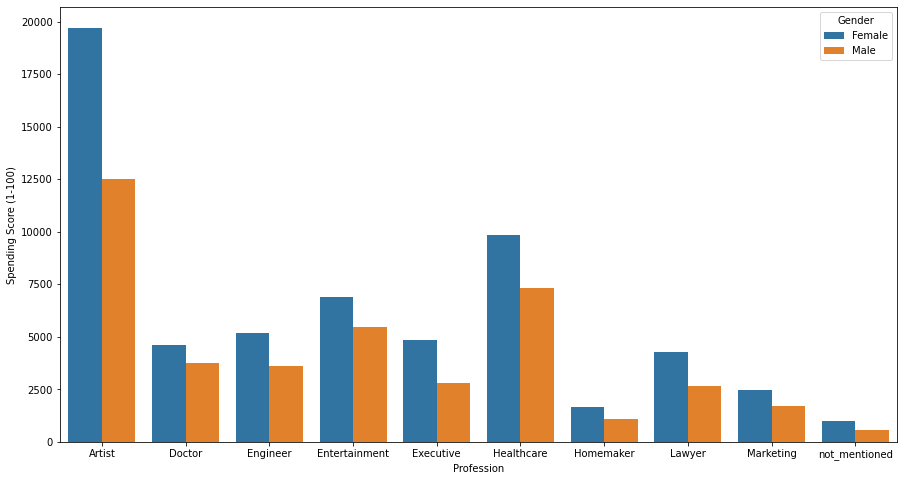

In [11]:
df4=pd.DataFrame(df.groupby(['Gender','Profession'])['Spending Score (1-100)'].sum())
display(df4.head(3))
df5=df4.reset_index()
display(df5.head(5))

plt.figure(figsize=(15,8))
sns.barplot(x='Profession', y='Spending Score (1-100)', hue='Gender', data=df5)

In [12]:
df_obj = df.loc[:, df.dtypes!='Int64']


In [13]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['Profession_labels']=le.fit_transform(df_obj['Profession'])
df['gender_labels']=le.fit_transform(df_obj['Gender'])


In [106]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Profession_labels,gender_labels
0,1,Male,19,15000,39,Healthcare,1,4,5,1
1,2,Male,21,35000,81,Engineer,3,3,2,1
2,3,Female,20,86000,6,Engineer,1,1,2,0
3,4,Female,23,59000,77,Lawyer,0,2,7,0
4,5,Female,31,38000,40,Entertainment,2,6,3,0


In [14]:
df_final = df.loc[:, df.dtypes !='string']

In [15]:
df_final

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Profession_labels,gender_labels
0,1,19,15000,39,1,4,5,1
1,2,21,35000,81,3,3,2,1
2,3,20,86000,6,1,1,2,0
3,4,23,59000,77,0,2,7,0
4,5,31,38000,40,2,6,3,0
...,...,...,...,...,...,...,...,...
1995,1996,71,184387,40,8,7,0,0
1996,1997,91,73158,32,7,7,1,0
1997,1998,87,90961,14,9,2,5,1
1998,1999,77,182109,4,7,2,4,1


In [47]:
x = df_final[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size', 'gender_labels']].values
y = df_final[['Profession_labels']]

In [48]:
x

array([[19, 15000, 39, 1, 4, 1],
       [21, 35000, 81, 3, 3, 1],
       [20, 86000, 6, 1, 1, 0],
       ...,
       [87, 90961, 14, 9, 2, 1],
       [77, 182109, 4, 7, 2, 1],
       [90, 110610, 52, 5, 2, 1]], dtype=object)

In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0, n_init=6).fit(x)

set(list(kmeans.labels_))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

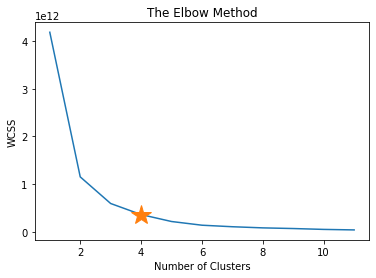

In [67]:
wcss=[]

num_ks = range(1, 12)
for i in num_ks:
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=3, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(num_ks, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.plot(4, wcss[3], marker='*', ms=20)
plt.show()

In [68]:
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_preds=kmeans.fit_predict(x)

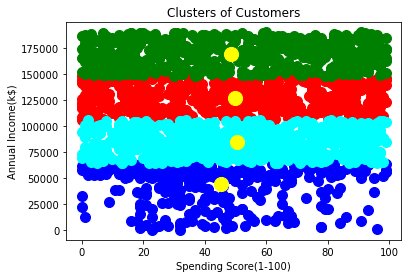

In [89]:
col1=0
col2=1

plt.scatter(x[y_preds==0, col1], x[y_preds==0, col2], s=100, c='red', label ='Cluster 1')
plt.scatter(x[y_preds==1, col1], x[y_preds==1, col2], s=100, c='blue', label ='Cluster 2')
plt.scatter(x[y_preds==2, col1], x[y_preds==2, col2], s=100, c='green', label ='Cluster 3')
plt.scatter(x[y_preds==3, col1], x[y_preds==3, col2], s=100, c='cyan', label ='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Spending Score(1-100)')
plt.ylabel('Annual Income(k$)')
plt.show()
    